In [1]:
#actually a form of classification, not necessarily regression
#outputs probabilities that an observation belongs to a binary class
#produces linear decision boundary

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [9]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
X = churn_df.drop('churn',axis=1).values
y = churn_df['churn'].values
print(X.shape, y.shape)

(3333, 19) (3333,)


In [11]:
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [13]:
#probability that the first row as churned
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred_probs[0]

0.15993253418446876

In [14]:
#0.5 is the default threshold of decision for logistics regression, as well as most models
#if we want to demo other thresholds, we can use an ROC curve, or a receiver operating characteristic curve
#essentially, it compares a trend line of thresholds to a dotted line with a slope of 1
#this dotted line is saying that if our threshold of decision is 1, our precision for true and false positives will both be 0
#by the same token, if our threshold of decision is 0, our precision for true and false negatives will both be 0

In [15]:
from sklearn.metrics import roc_curve

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

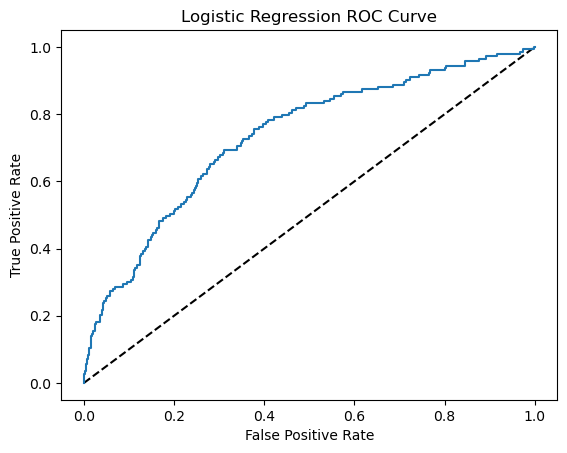

In [18]:
import matplotlib.pyplot as plt

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [19]:
#generally speaking, if the line is above the dotted line, then the model is doing better than randomly guessing
#to quantify ROC, calculate the area under the curve, termed AUC
#0 is bad, 1 is good

In [20]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.7323726448580591
